<a href="https://colab.research.google.com/github/Kallukalluzzz/DL-Lab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras

DATASET LOADING

In [2]:
mnistDB = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnistDB.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

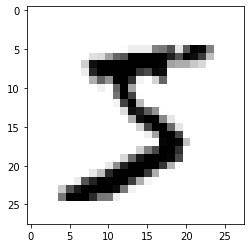

In [7]:
plt.imshow(X_train[0],cmap='binary')

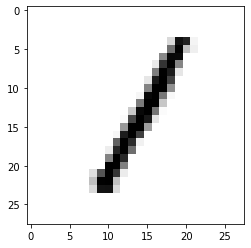

In [8]:
plt.imshow(X_train[55000],cmap='binary')

convert to 1 channel

In [9]:
X_train=X_train.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

NORMALIZE DATA(X_train & X_Test

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [13]:
cnn_MNIST = keras.models.Sequential()


In [14]:
cnn_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=X_train.shape[1:]))

In [15]:
cnn_MNIST.add(keras.layers.Conv2D(64,(3,3),activation="relu"))

In [16]:
cnn_MNIST.add(keras.layers.MaxPooling2D((2,2)))

In [17]:
cnn_MNIST.add(keras.layers.Dropout(0.25))

In [18]:
cnn_MNIST.add(keras.layers.Flatten())

In [19]:
cnn_MNIST.add(keras.layers.Dense(128,activation="relu"))

In [20]:
cnn_MNIST.add(keras.layers.Dropout(0.25))

In [21]:
cnn_MNIST.add(keras.layers.Dense(10,activation="softmax"))

In [22]:
cnn_MNIST.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [23]:
import tensorflow as tf
#opt = tf.keras.optimizers.Adam(0.1)
cnn_MNIST.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
cnn_MNIST.fit(X_train,y_train,epochs=5,batch_size=5000)

Epoch 1/5
12/12 [==============================] - 2s 190ms/step - loss: 0.1111 - accuracy: 0.9672
Epoch 2/5
12/12 [==============================] - 2s 196ms/step - loss: 0.0904 - accuracy: 0.9730
Epoch 3/5
12/12 [==============================] - 2s 191ms/step - loss: 0.0783 - accuracy: 0.9769
Epoch 4/5
12/12 [==============================] - 2s 191ms/step - loss: 0.0687 - accuracy: 0.9795
Epoch 5/5
12/12 [==============================] - 2s 190ms/step - loss: 0.0622 - accuracy: 0.9816


In [27]:
test_loss,test_accuracy=cnn_MNIST.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0429 - accuracy: 0.9867


In [28]:
print(test_loss,test_accuracy)

0.042919889092445374 0.9866999983787537
